[*********************100%***********************]  1 of 1 completed


Data Head:
Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-01-02  184.532074  187.315366  182.792518  186.033057  82488700
2024-01-03  183.150375  184.770652  182.335262  183.120556  58414500
2024-01-04  180.824341  181.997291  179.800489  181.062899  71983600
2024-01-05  180.098694  181.669266  179.094727  180.903872  62303300
2024-01-08  184.452560  184.492330  180.416793  181.003268  59144500


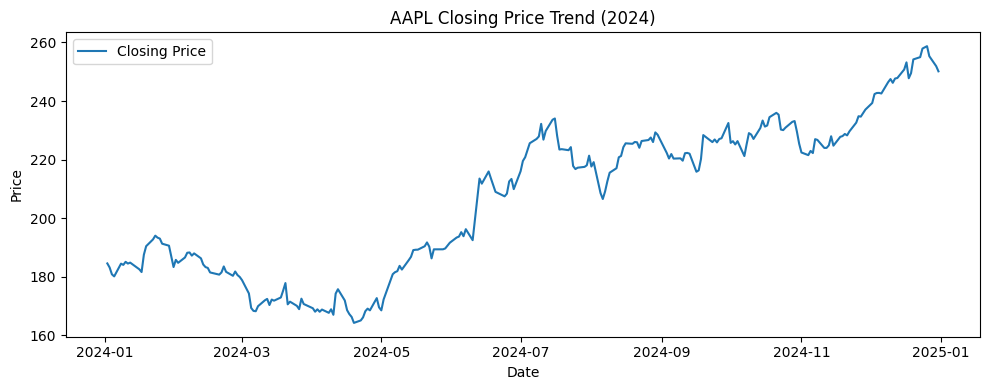

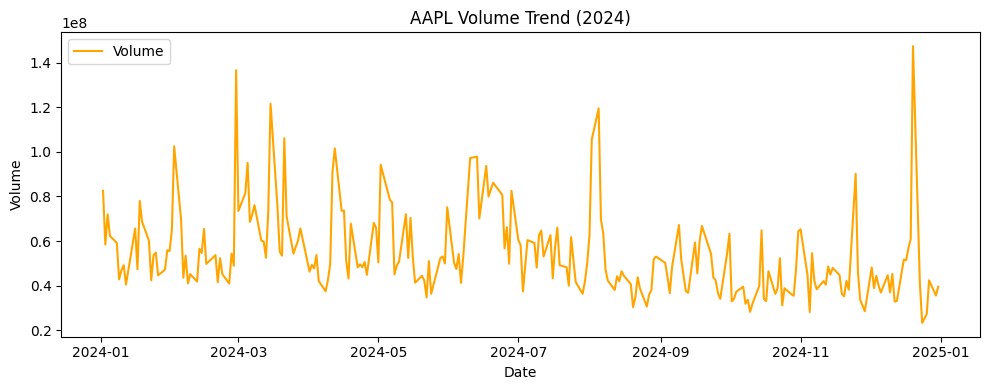

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

data=yf.download('AAPL',start='2024-01-01',end='2025-01-01')
data.to_csv('Apple.csv')

print("Data Head:")
print(data.head())

z_scores = np.abs(stats.zscore(data[['Open', 'High', 'Low', 'Close', 'Volume']]))
data = data[(z_scores < 3).all(axis=1)]  # Keep data within 3 standard deviations

data['Price_Up'] = (data['Close'] > data['Close'].shift(1)).astype(int)
data = data.dropna()

features = ['Open', 'High', 'Low', 'Close', 'Volume']
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data[features]), columns=features, index=data.index)
data_scaled['Price_Up'] = data['Price_Up']

# Save preprocessed data
data_scaled.to_csv('AAPL_preprocessed.csv')

# Define the stock symbol
stock_symbol = 'AAPL'  # Assign the stock symbol here

# Visualizations (unchanged)
plt.figure(figsize=(10, 4))
plt.plot(data['Close'], label='Closing Price')
plt.title(f'{stock_symbol} Closing Price Trend (2024)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.savefig('closing_price_trend.png')
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(data['Volume'], color='orange', label='Volume')
plt.title(f'{stock_symbol} Volume Trend (2024)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.tight_layout()
plt.savefig('volume_trend.png')
plt.show()

